In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:


df=pd.read_csv('/home/kumaran/Downloads/Project/hr/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')



In [4]:


print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()



No of Rows: 1470
No of Columns: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:


# As we have 35 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups



{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [8]:


df.duplicated().sum()

0

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

<AxesSubplot:>

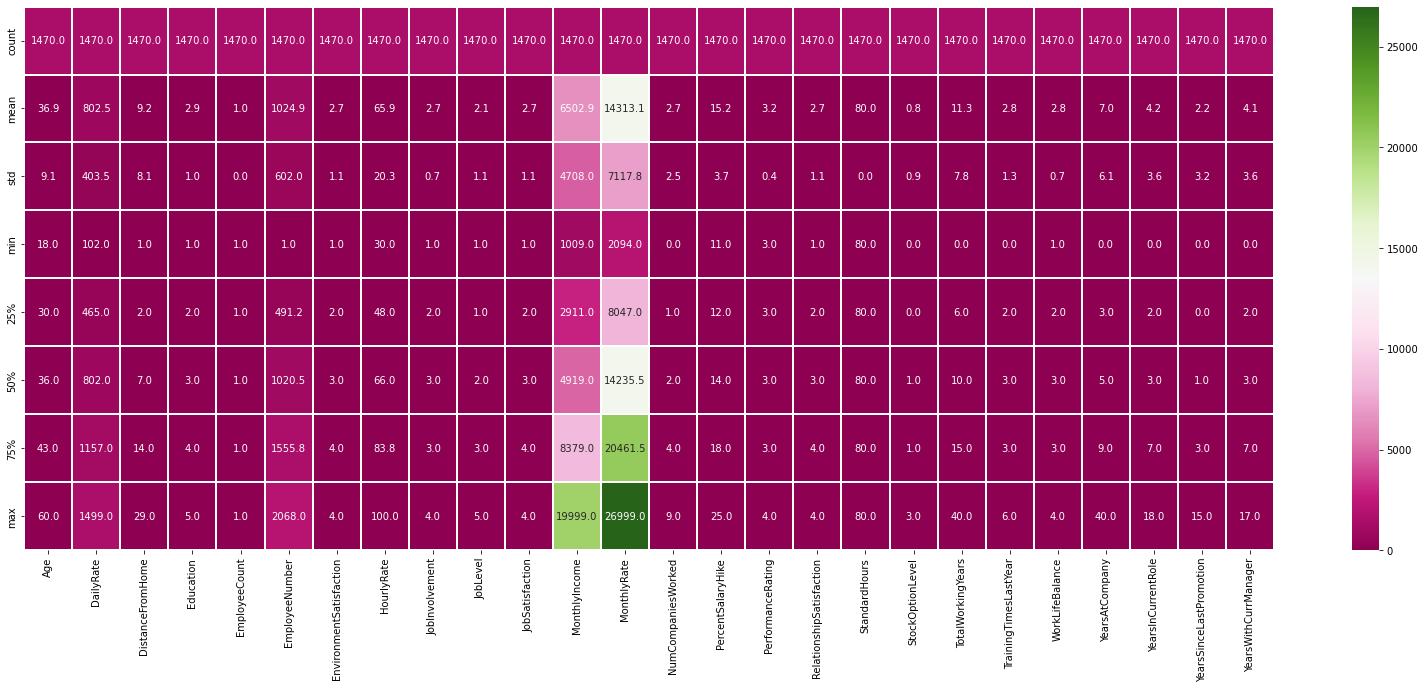

In [10]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [11]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


In [12]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

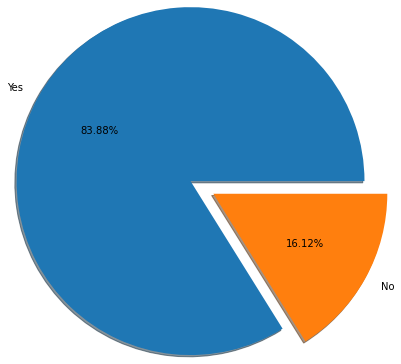

In [13]:


labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()



In [14]:


Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)
    



Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
MaritalStatus
Married     673
Single 

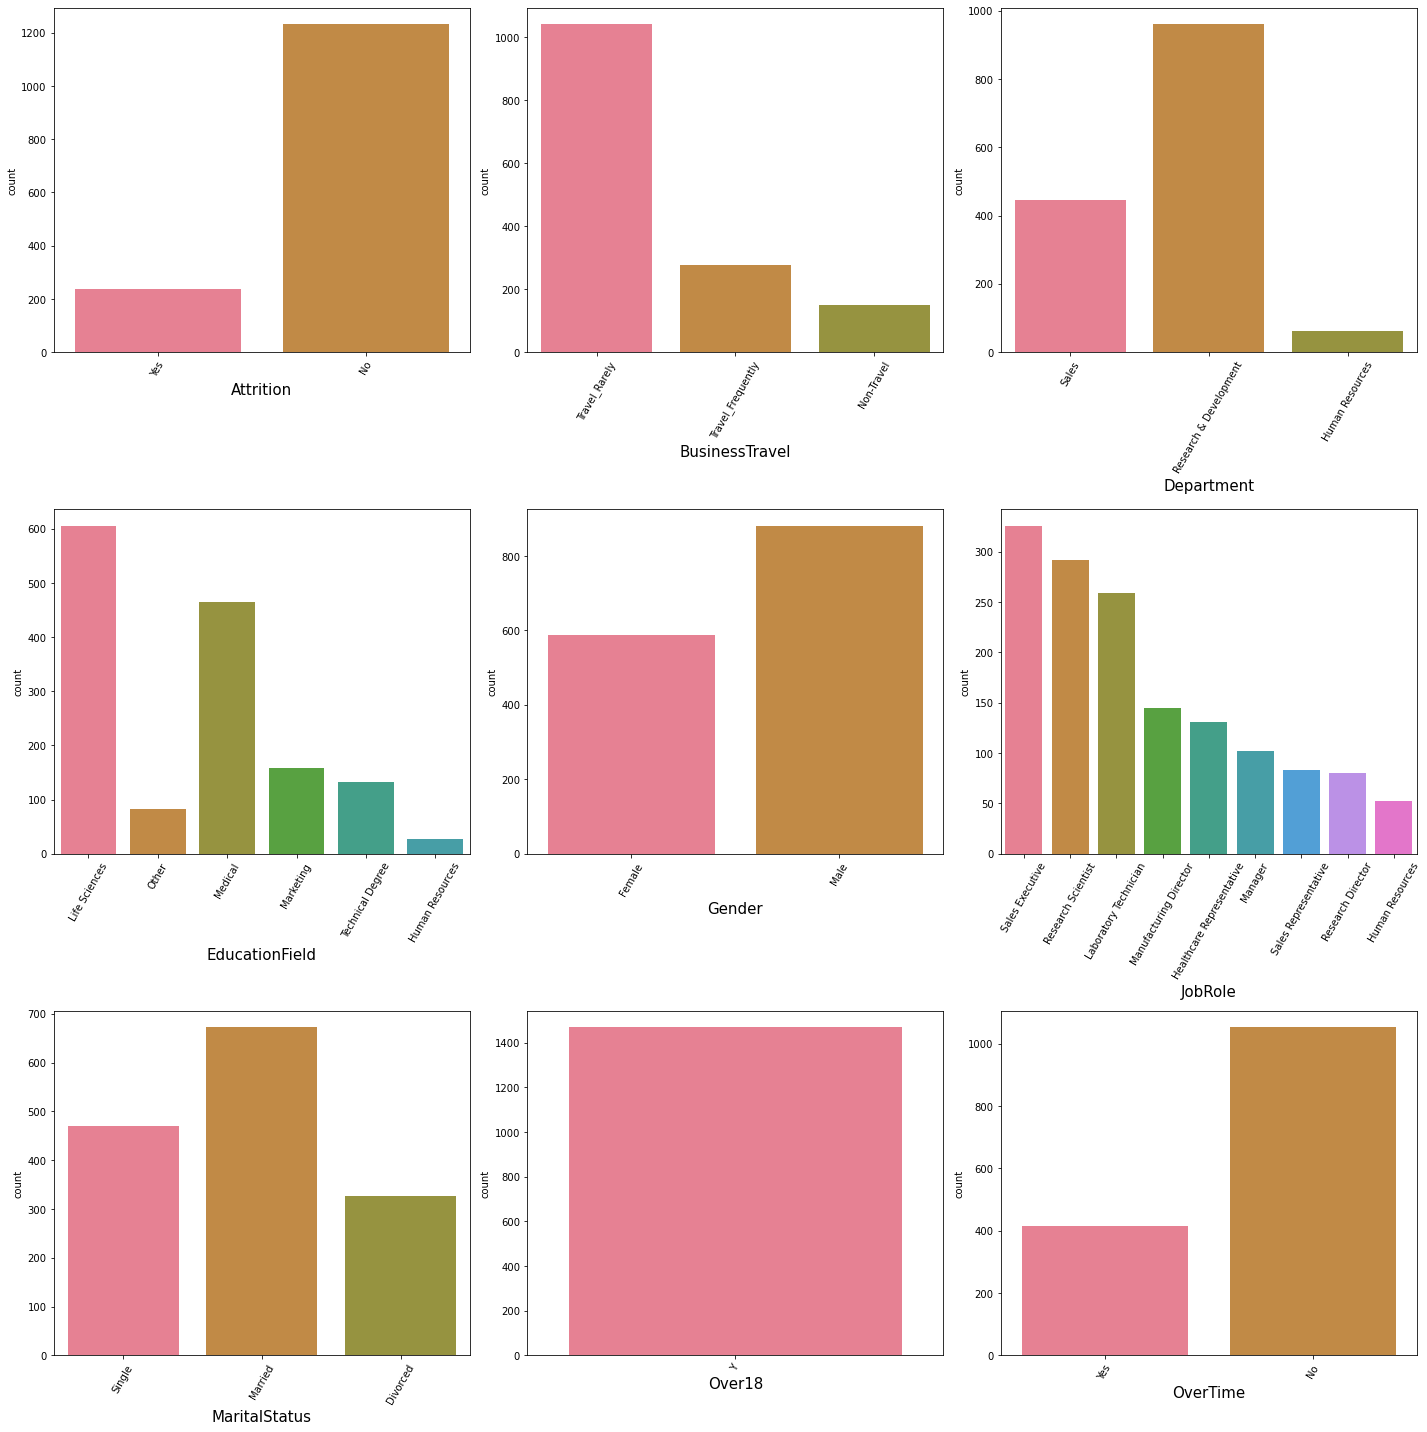

In [23]:

custom_palette = sns.color_palette("husl", 9)  # You can adjust the number of colors as needed

plt.figure(figsize=(20, 20), facecolor='white')

Category = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
             'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for i, category in enumerate(Category, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=category, palette=custom_palette)  # Apply custom palette to each count plot
    plt.xlabel(category, fontsize=15)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


In [24]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*100)



Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


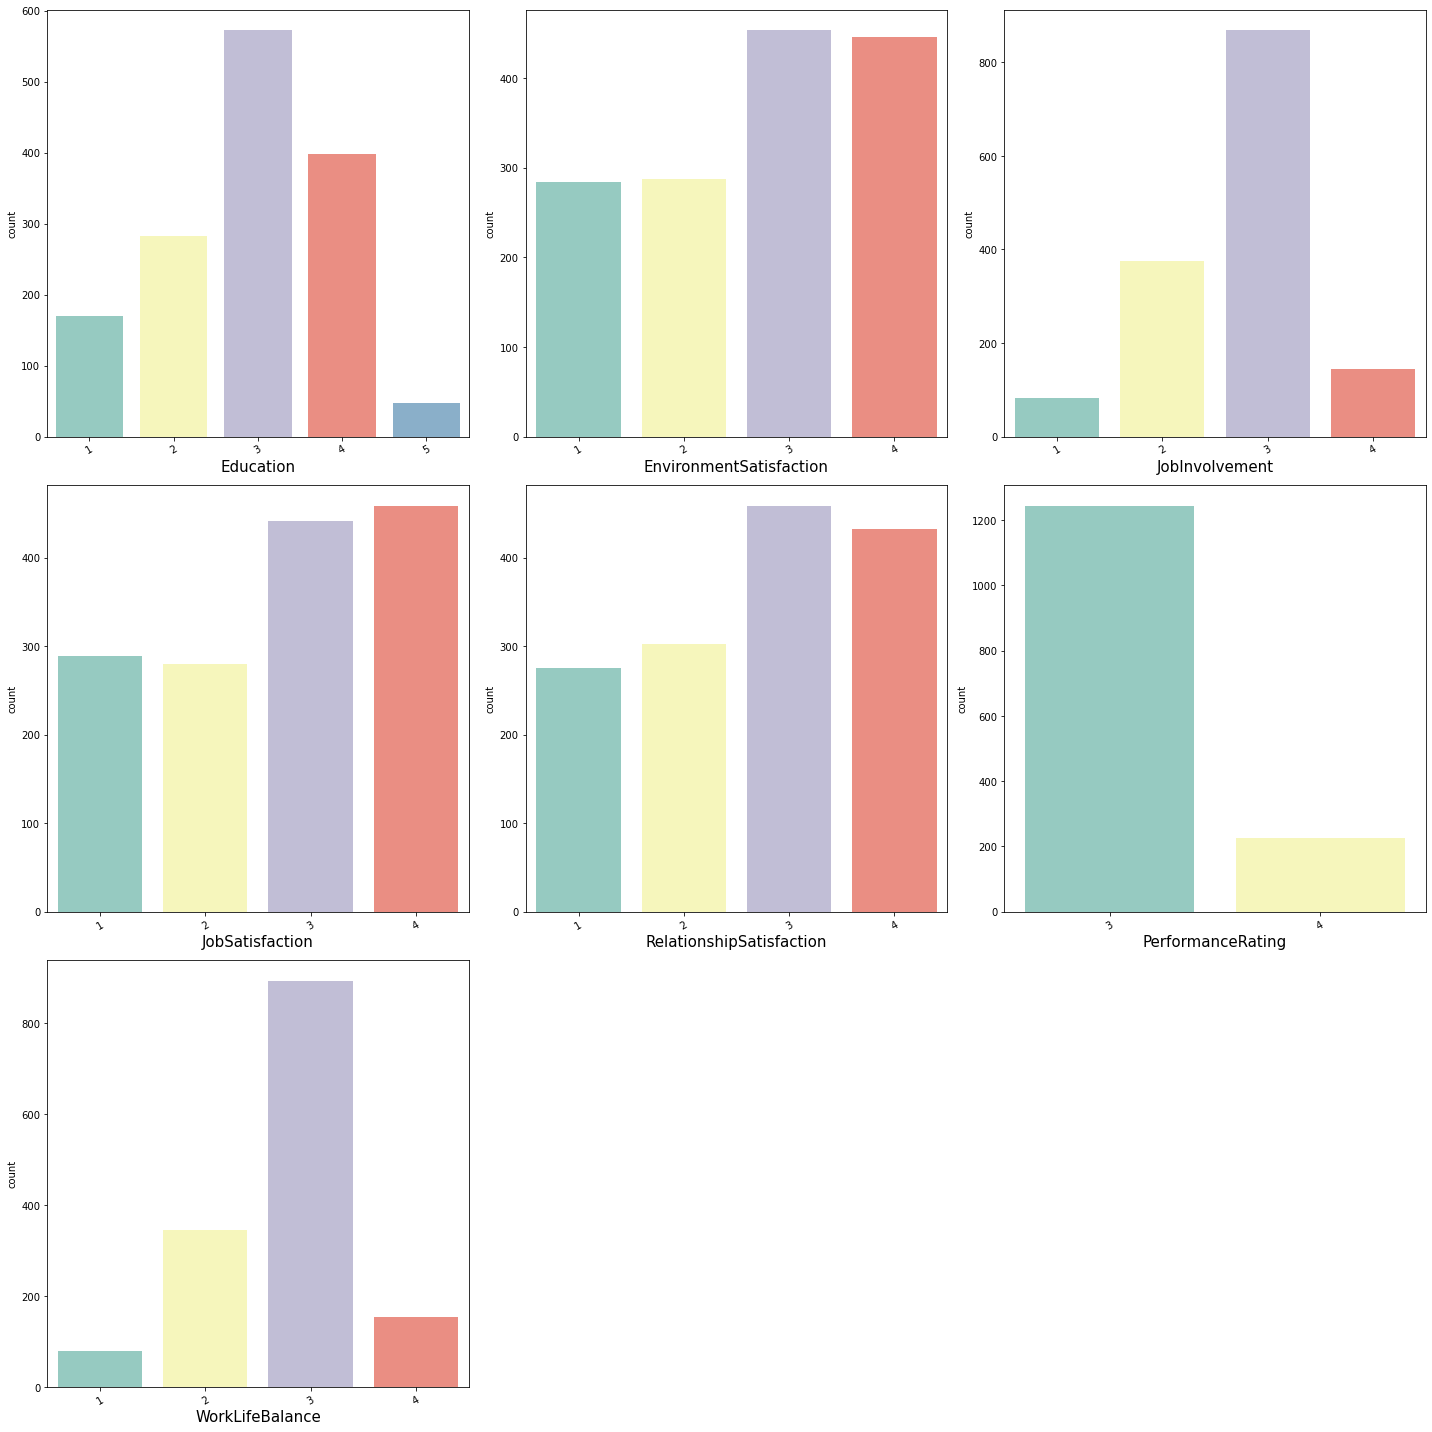

In [26]:
sns.set_palette('Set3')
plt.figure(figsize=(20, 20), facecolor='white')

Ordinal = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
           'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance']

for i, ordinal_var in enumerate(Ordinal, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[ordinal_var].value_counts().index, y=df[ordinal_var].value_counts(),
                palette='Set3')
    plt.xlabel(ordinal_var, fontsize=15)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

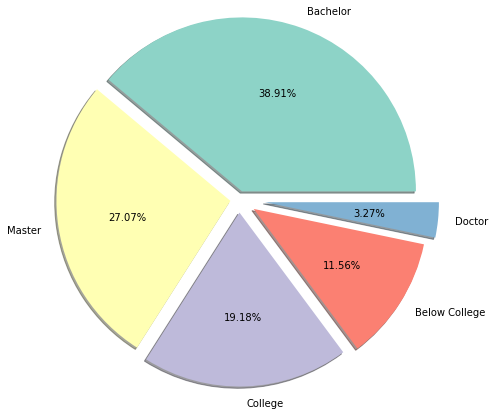

In [27]:


labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()



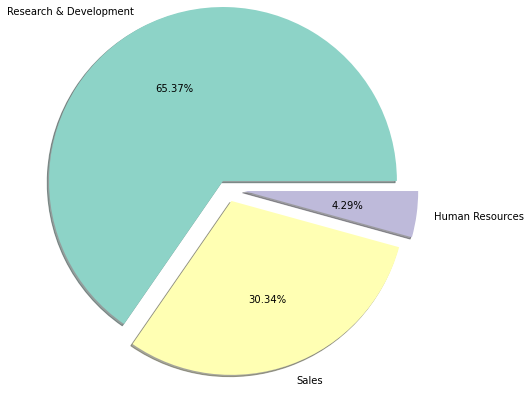

In [28]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()


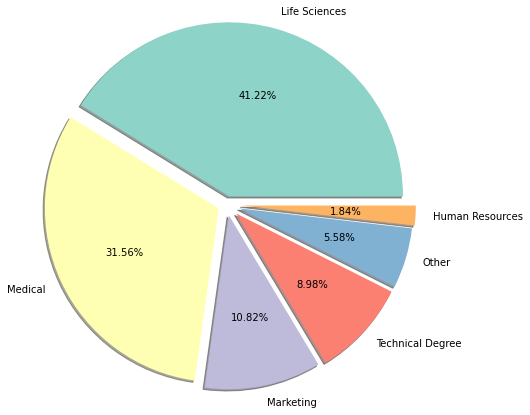

In [29]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

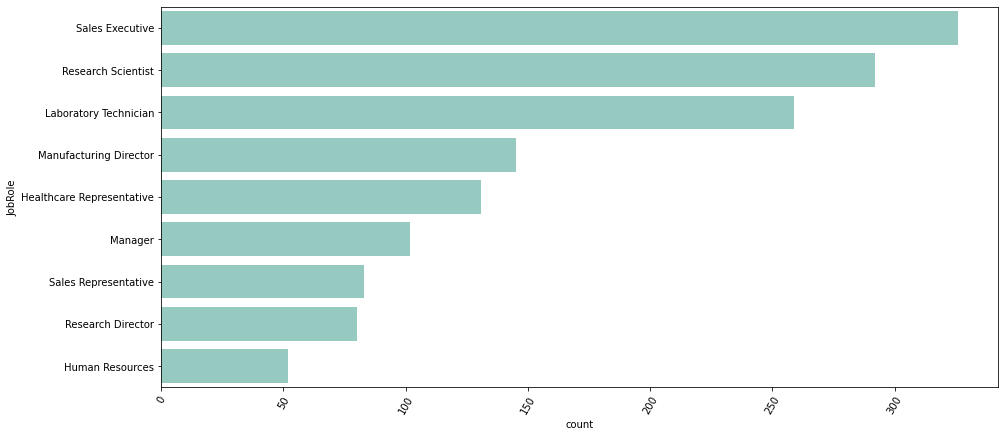

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])
plt.xticks(rotation=60)
plt.show()

<Figure size 864x720 with 0 Axes>

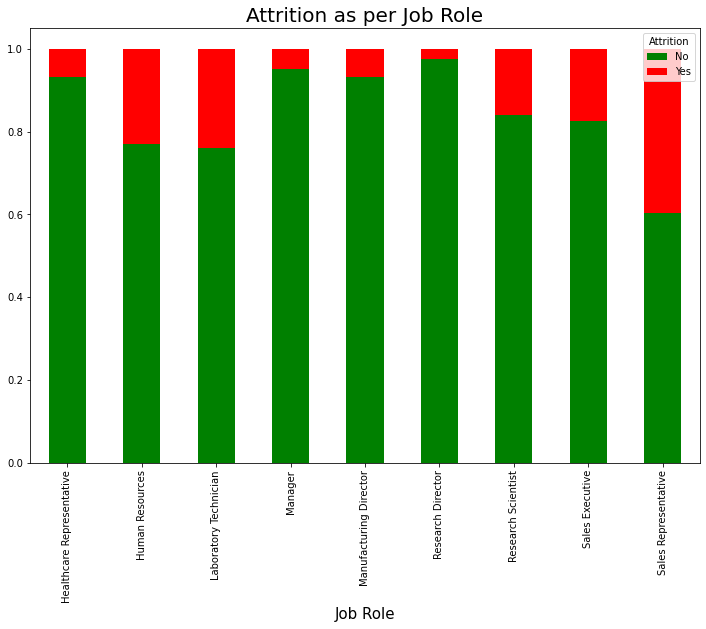

In [37]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

In [38]:


# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']



In [39]:


# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']



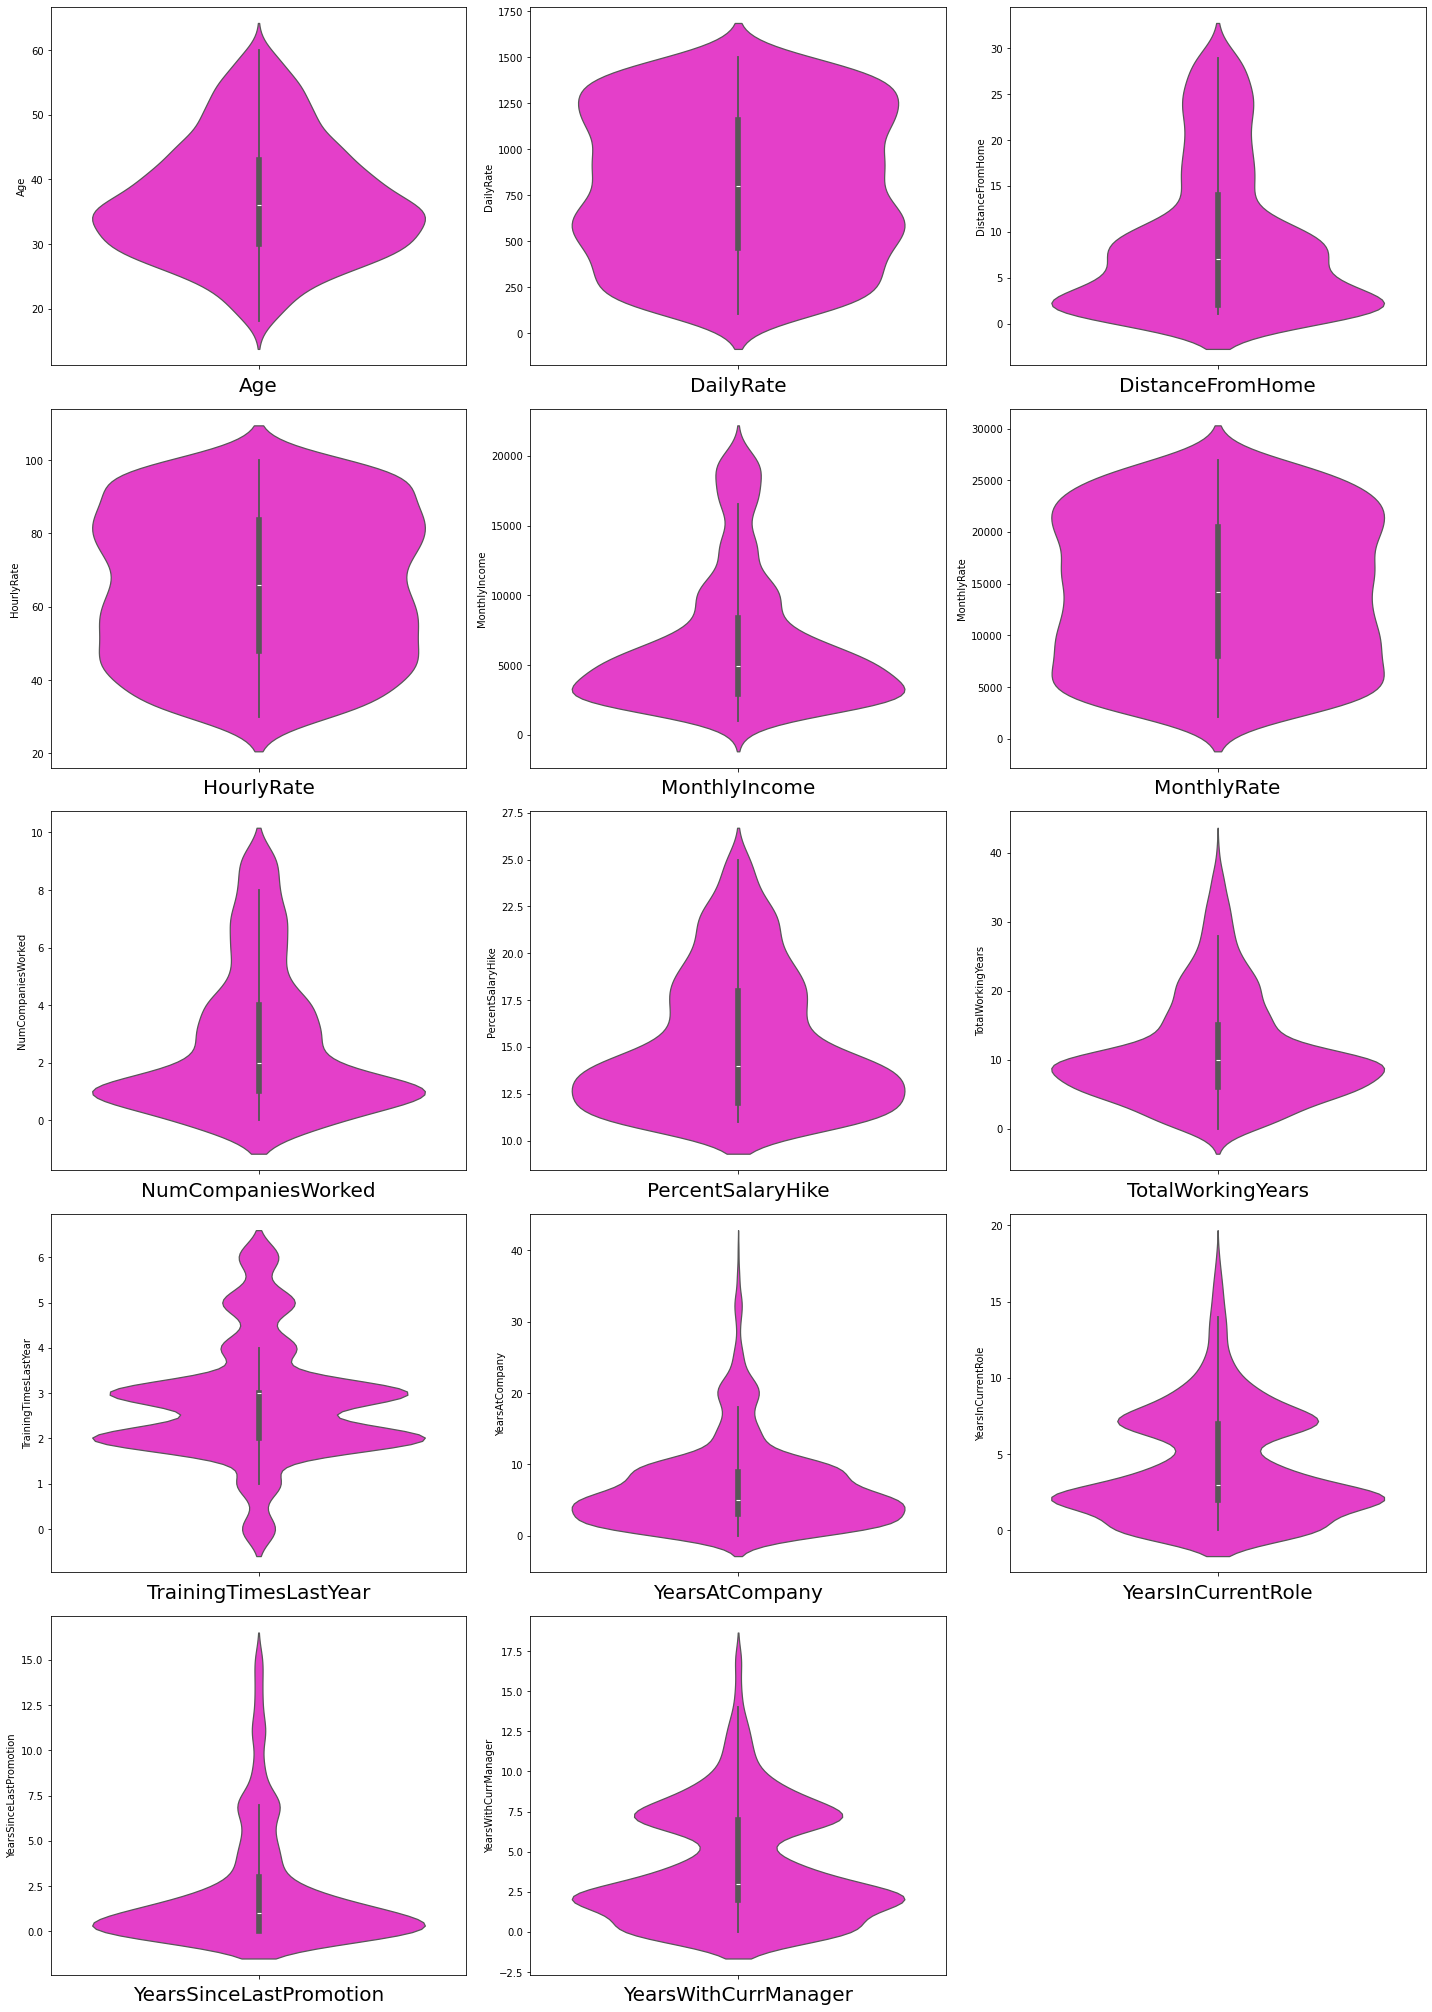

In [40]:


sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='Age', ylabel='count'>

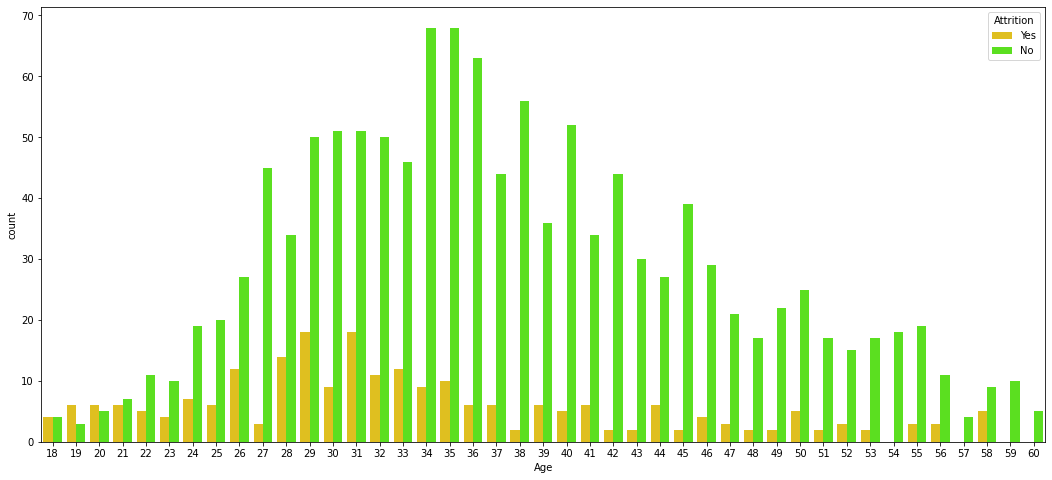

In [42]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

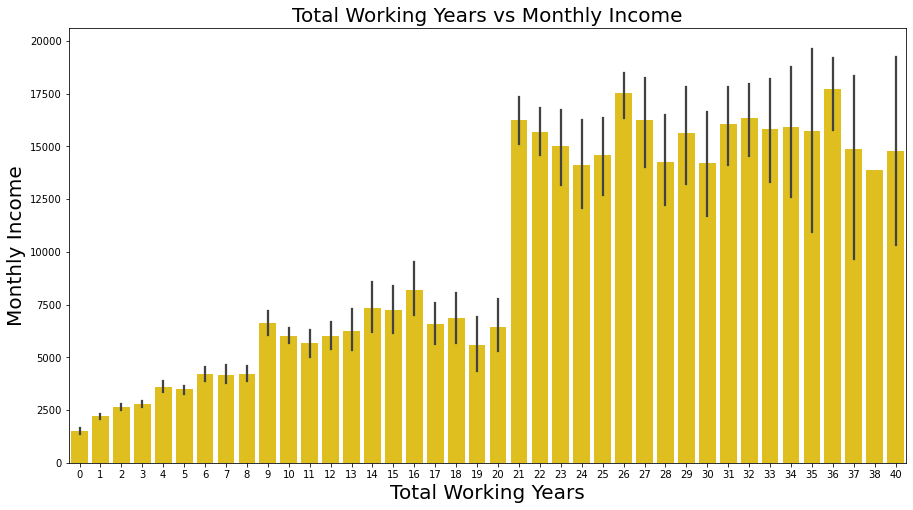

In [44]:
plt.figure(figsize=(15, 8))

# Use 'x' and 'y' parameters to specify columns for the bar plot
sns.barplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

plt.xlabel('Total Working Years', fontsize=20)
plt.ylabel('Monthly Income', fontsize=20)
plt.title("Total Working Years vs Monthly Income", fontsize=20)

plt.show()

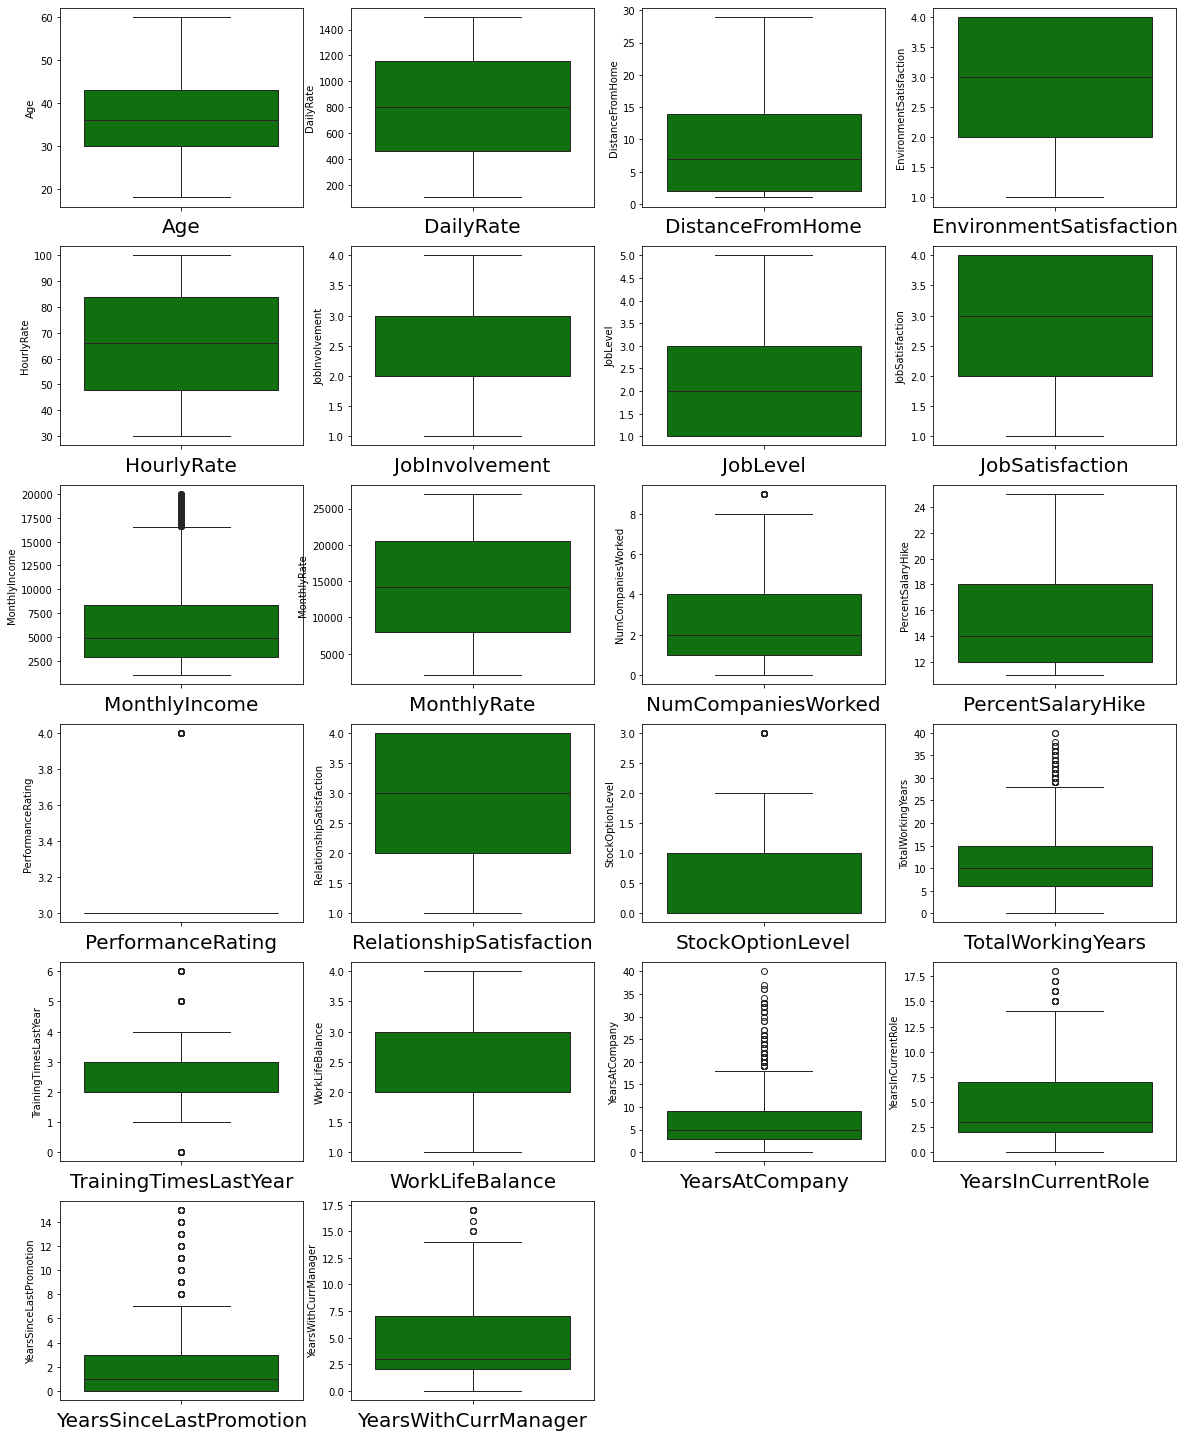

In [45]:


plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

